In [4]:
%matplotlib inline
%pylab inline
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import glob
import sys
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Populating the interactive namespace from numpy and matplotlib


In [35]:
#!/usr/bin/python

#open file
path = "../data/"
dirs = os.listdir( path )
for file in dirs:
   print(file)

Q1_2017.csv
Q1_2018.csv
Q2_2017.csv
Q2_2018.csv
Q3_2016.csv
Q3_2017.csv
Q4_2016.csv
Q4_2017.csv
temp


In [32]:
#import dask.dataframe as dd
#df = dd.read_csv('../data/Q*.csv')


In [36]:
print(os.listdir(path))

['Q1_2017.csv', 'Q1_2018.csv', 'Q2_2017.csv', 'Q2_2018.csv', 'Q3_2016.csv', 'Q3_2017.csv', 'Q4_2016.csv', 'Q4_2017.csv', 'temp']


In [4]:
# Histogram of column data
def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = (nCol + nHistogramPerRow - 1) / nHistogramPerRow
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i+1)
        df.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [5]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [7]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# metro-bike-share-trip-data.csv has 132427 rows in reality, but we are only loading/previewing the first 1000 rows

df1 = pd.read_csv('../Jupyter/input/metro-bike-share-trips-2018-q2.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'metro-bike-share-trips-2018-q2.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 14 columns


In [18]:
df1.head(30)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,79633812,4,2018-04-01 00:04:00,2018-04-01 00:08:00,3062,34.047749,-118.243172,3027,34.049980,-118.247162,6073,30,One Way,Monthly Pass
1,79640723,56,2018-04-01 00:09:00,2018-04-01 01:05:00,4211,33.984928,-118.469963,4211,33.984928,-118.469963,6406,0,Round Trip,Walk-up
2,79633811,11,2018-04-01 00:15:00,2018-04-01 00:26:00,3019,34.038609,-118.260857,3027,34.049980,-118.247162,6213,365,One Way,Flex Pass
3,79633810,11,2018-04-01 00:28:00,2018-04-01 00:39:00,4214,33.995560,-118.481552,4210,33.984341,-118.471550,5889,0,One Way,Walk-up
4,79633809,7,2018-04-01 00:32:00,2018-04-01 00:39:00,4214,33.995560,-118.481552,4210,33.984341,-118.471550,12379,0,One Way,Walk-up
5,79633808,23,2018-04-01 00:35:00,2018-04-01 00:58:00,3075,34.042110,-118.256187,3075,34.042110,-118.256187,6242,0,Round Trip,Walk-up
6,79633807,22,2018-04-01 00:36:00,2018-04-01 00:58:00,3075,34.042110,-118.256187,3075,34.042110,-118.256187,12132,0,Round Trip,Walk-up
7,79633806,9,2018-04-01 00:43:00,2018-04-01 00:52:00,3067,34.045181,-118.250237,3042,34.049301,-118.238808,6606,30,One Way,Monthly Pass
8,79633805,7,2018-04-01 00:44:00,2018-04-01 00:51:00,3062,34.047749,-118.243172,3031,34.044701,-118.252441,12237,30,One Way,Monthly Pass
9,79633804,3,2018-04-01 00:50:00,2018-04-01 00:53:00,3022,34.046070,-118.233093,3042,34.049301,-118.238808,6510,0,One Way,Walk-up


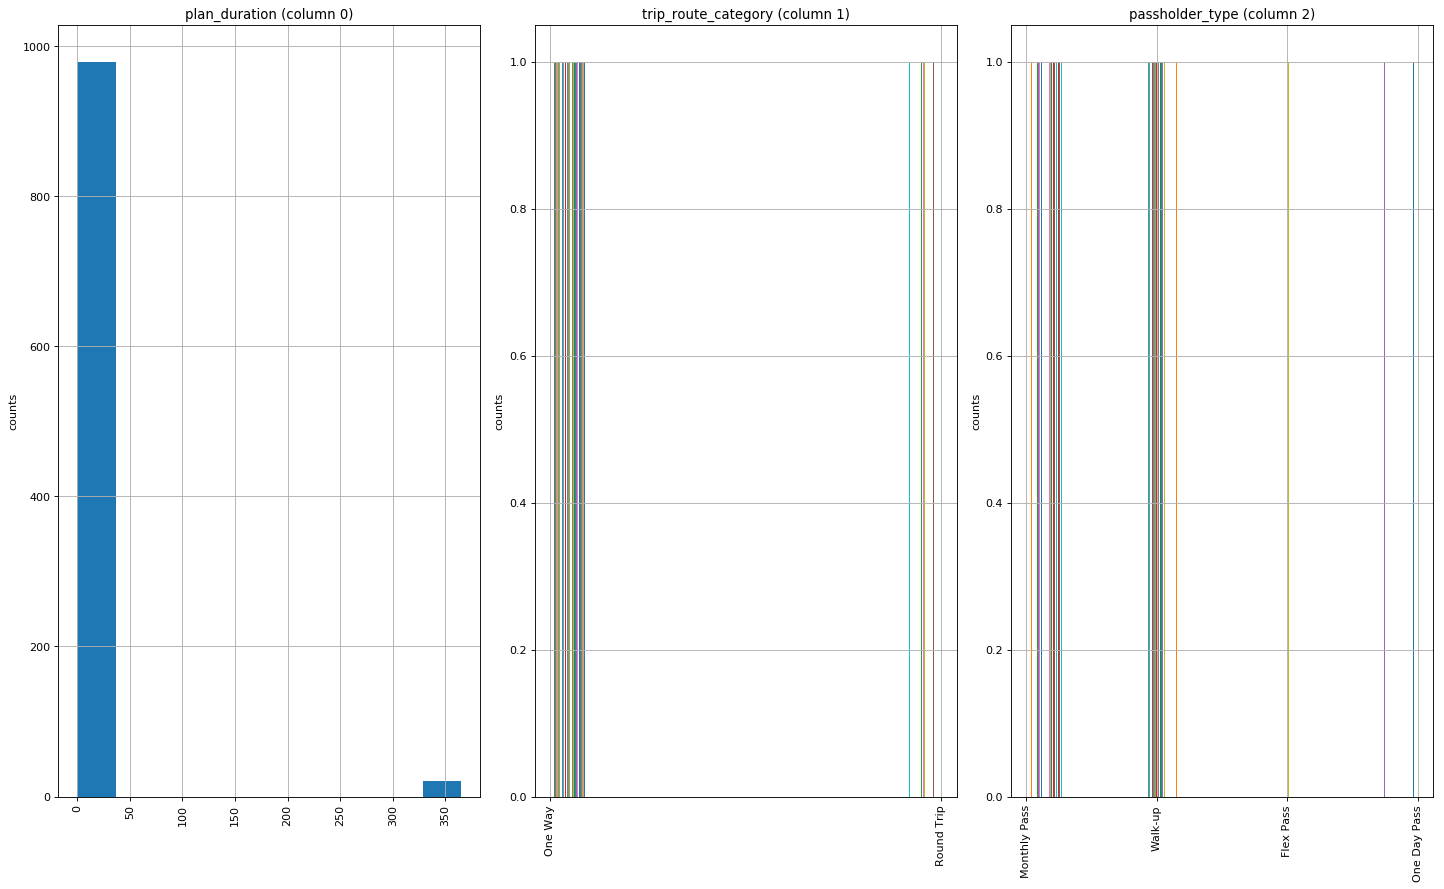

In [11]:
plotHistogram(df1, 10 , 5)

In [15]:
plotCorrelationMatrix(df1, 7)

NameError: name 'plotCorrelationMatrix' is not defined

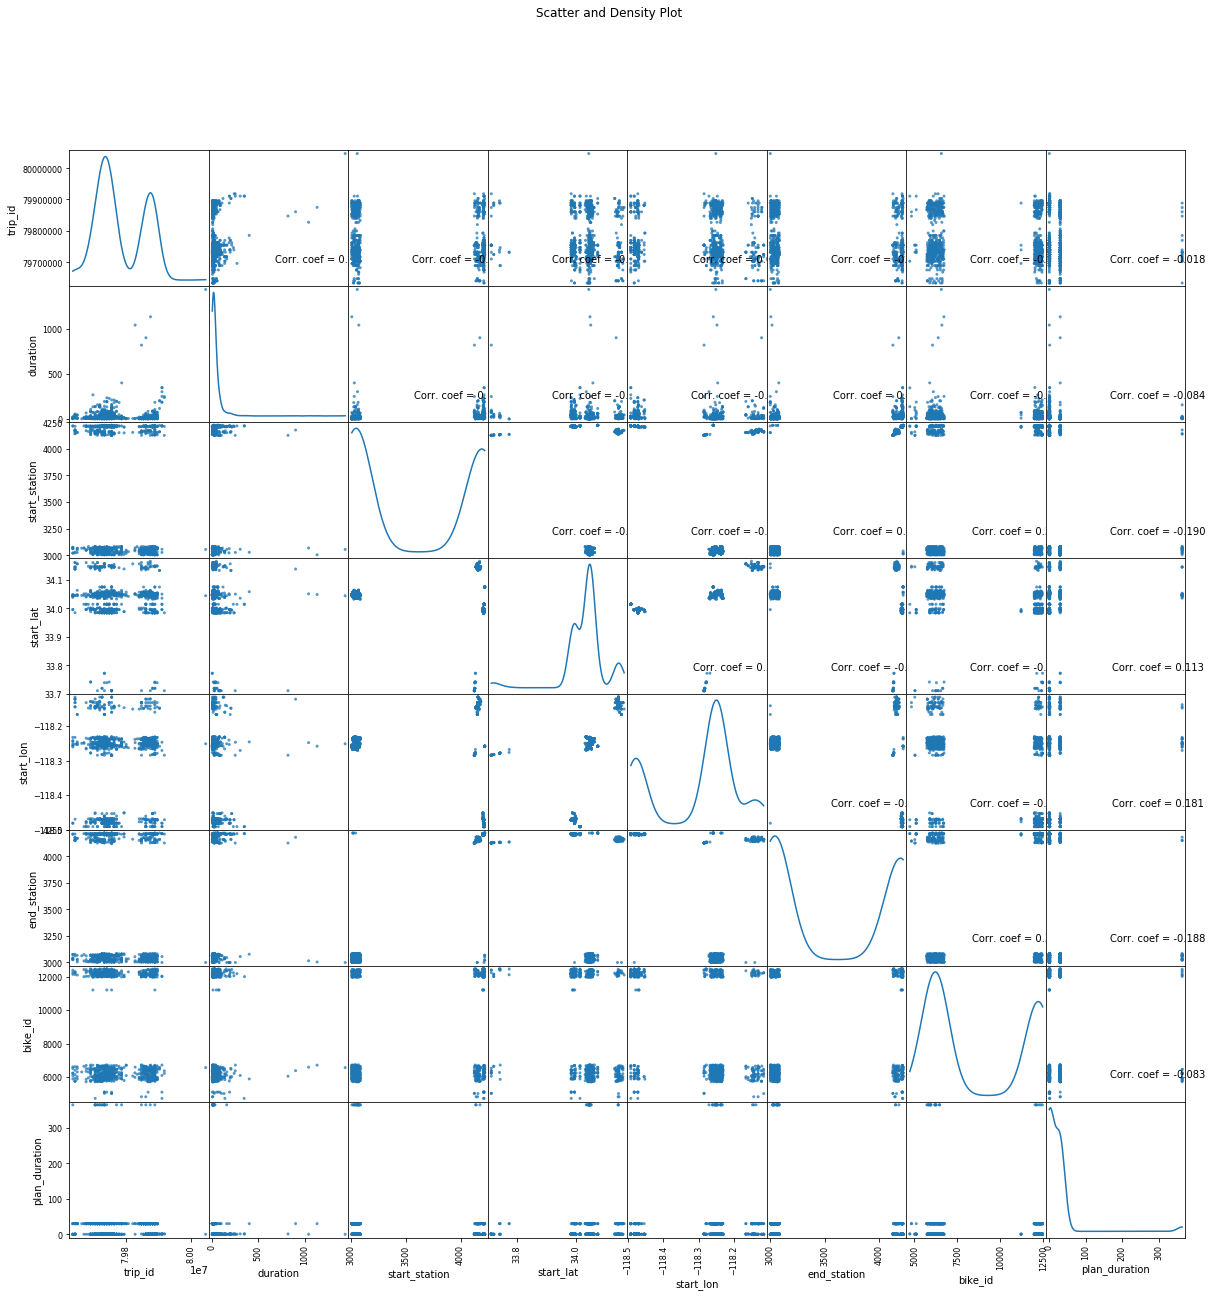

In [16]:
plotScatterMatrix(df1, 20, 10)